In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset
df = pd.read_csv("titanic.csv")

# print the first few rows of the DataFrame
print(df.head())

   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [4]:
# print the DataFrame's shape
print(df.shape)

(1310, 14)


In [5]:
# print the DataFrame's data types
print(df.dtypes)

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object


In [6]:
# check for missing values
print(df.isnull().sum())

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64


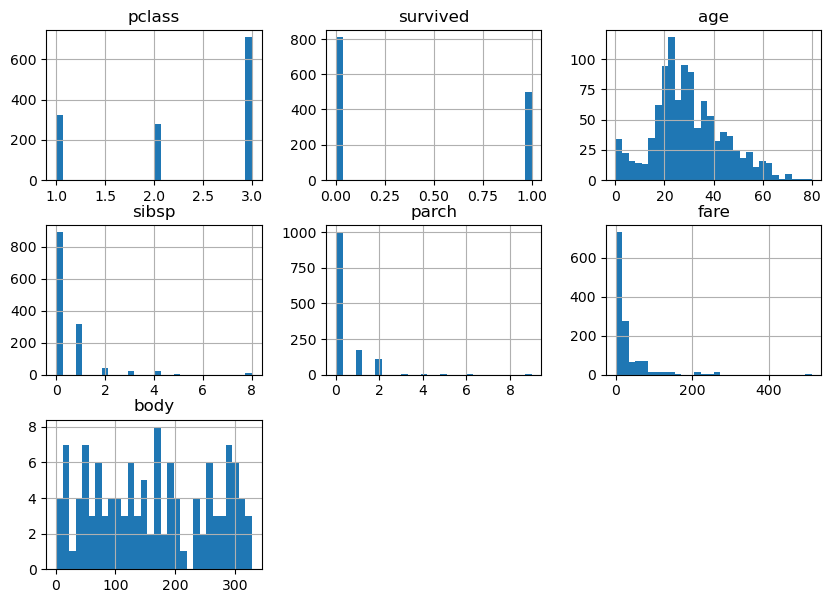

In [14]:
# visualize the distribution of a numeric column
df.hist(bins=30, figsize=(10,7))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


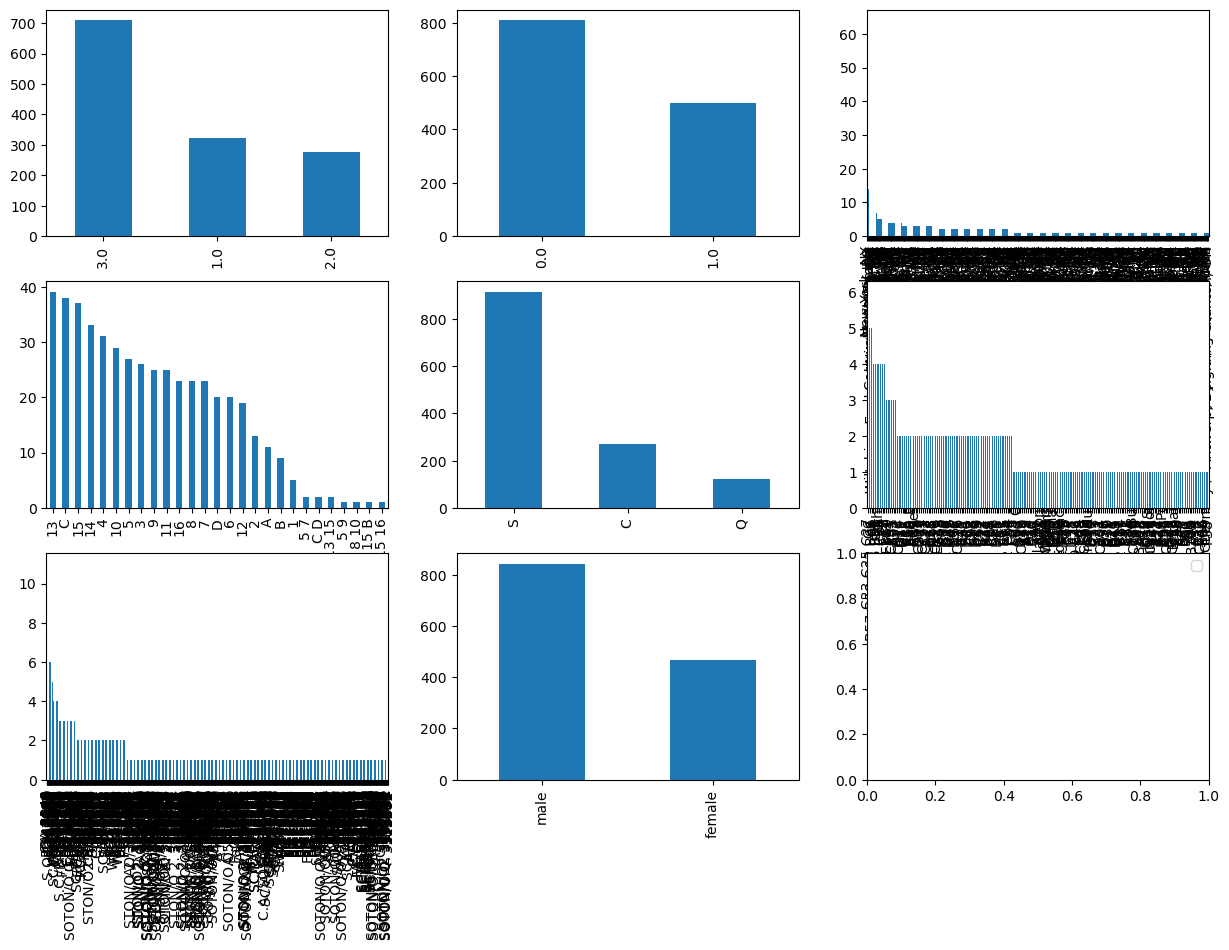

In [22]:
# visualize the distribution of a categorical column
categorical_columns = [
    'pclass','survived', 'home.dest','boat','embarked','cabin','ticket','sex'
]

f, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=False)
i = [0,0,0,1,1,1,2,2,2]
j=[0,1,2,0,1,2,0,1,2]
column=categorical_columns

for c, i, j in zip(column, i, j):
    ax=df[c].value_counts().plot(kind='bar', ax = axes[i, j])

plt.legend()
plt.show()

In [10]:
# calculate basic statistics for a numeric column
print(df['fare'].describe())

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64


In [11]:
# calculate the correlation between two numeric columns
print(df['fare'].corr(df['survived']))

0.2442654689148123


In [12]:
# group the data by a categorical column and calculate statistics
grouped_df = df.groupby('pclass')['survived'].mean()
print(grouped_df)

pclass
1.0    0.619195
2.0    0.429603
3.0    0.255289
Name: survived, dtype: float64


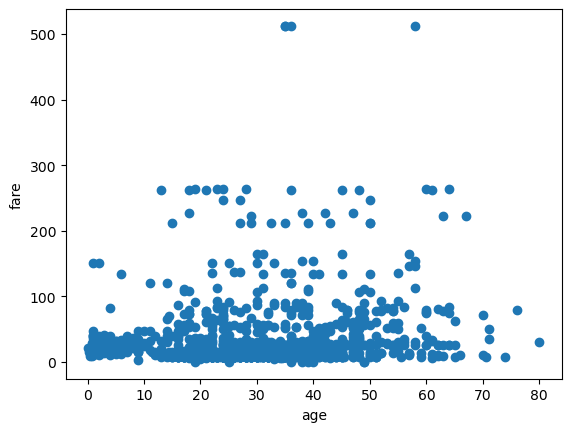

In [24]:
# create a scatter plot to visualize the relationship between two numeric columns
plt.scatter(df['age'], df['fare'])
plt.xlabel('age')
plt.ylabel('fare')
plt.show()


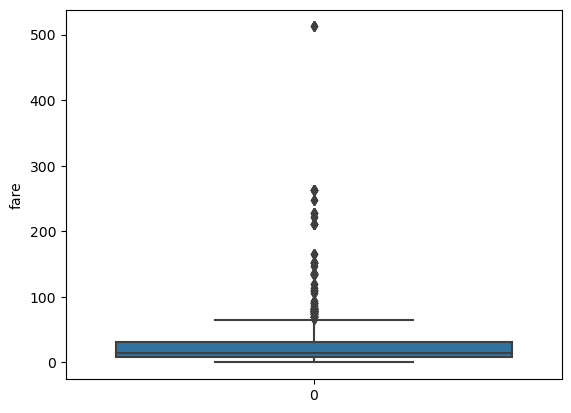

In [34]:
# create a box plot to visualize the distribution of a numeric column
sns.boxplot(df['fare'])
plt.ylabel('fare')
plt.show()

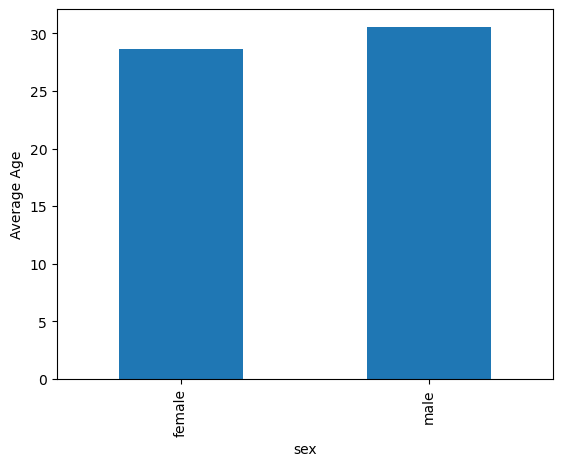

In [28]:
# create a bar plot to visualize the mean of a numeric column for each category of a categorical column
df.groupby('sex')['age'].mean().plot(kind='bar')
plt.ylabel('Average age')
plt.show()

In [29]:
# create a pivot table to summarize the data
pivot_table = df.pivot_table(index='sex', columns='pclass', values='fare', aggfunc='mean')
print(pivot_table)

pclass         1.0        2.0        3.0
sex                                     
female  109.412385  23.234827  15.324250
male     69.888385  19.904946  12.415462


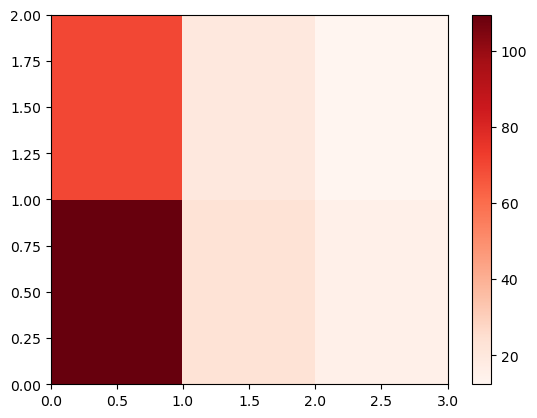

In [30]:
# create a heatmap to visualize the pivot table
plt.pcolor(pivot_table, cmap='Reds')
plt.colorbar()
plt.show()

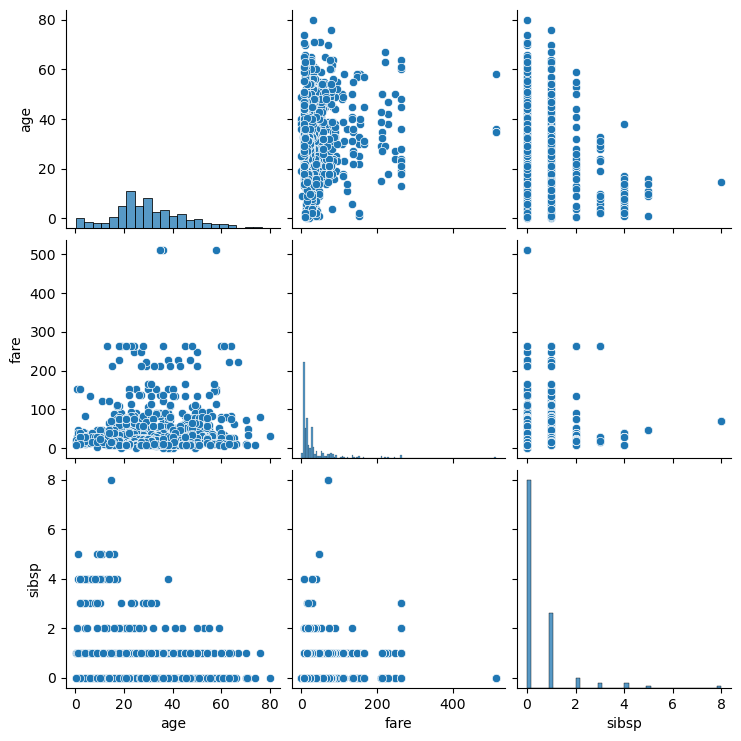

In [31]:
# create a pairplot to visualize the relationships between multiple numeric columns
import seaborn as sns
sns.pairplot(df, vars=['age', 'fare', 'sibsp'])
plt.show()

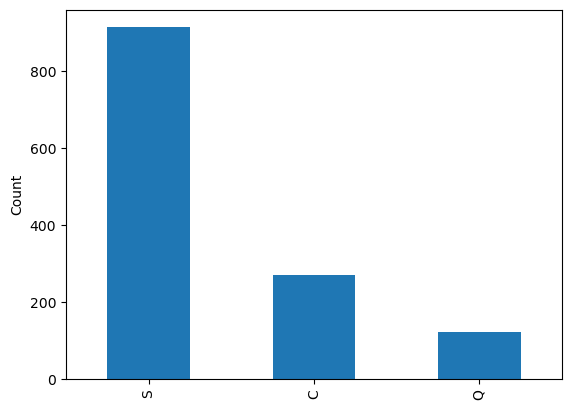

In [35]:
# create a bar plot to visualize the count of a categorical column
df['embarked'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

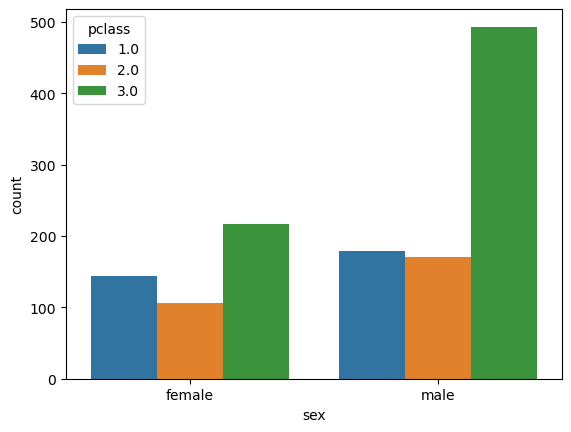

In [36]:
# create a countplot to visualize the count of a categorical column by the categories of another categorical column
sns.countplot(x='sex', hue='pclass', data=df)
plt.show()

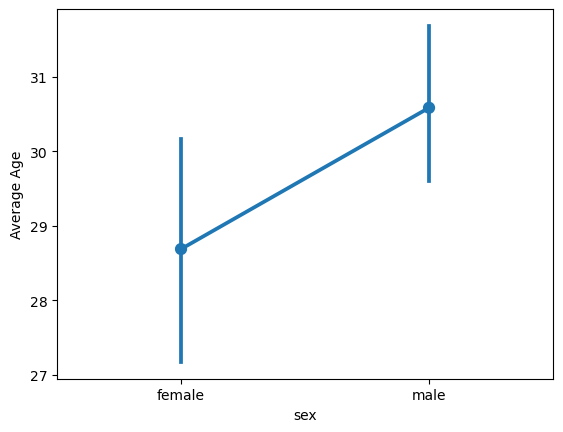

In [37]:
# create a point plot to visualize the mean of a numeric column by the categories of a categorical column
sns.pointplot(x='sex', y='age', data=df)
plt.ylabel('Average age')
plt.show()

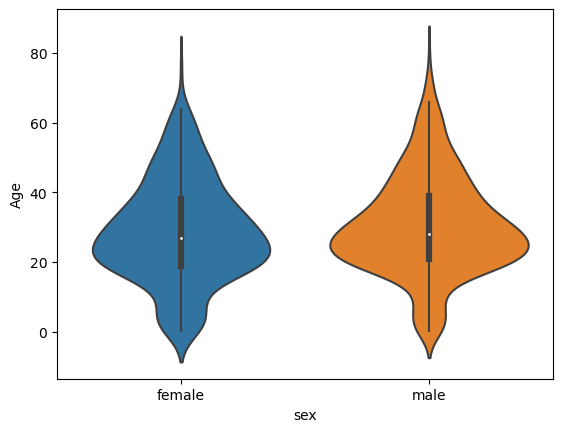

In [38]:
# create a violin plot to visualize the distribution of a numeric column by the categories of a categorical column
sns.violinplot(x='sex', y='age', data=df)
plt.ylabel('age')
plt.show()

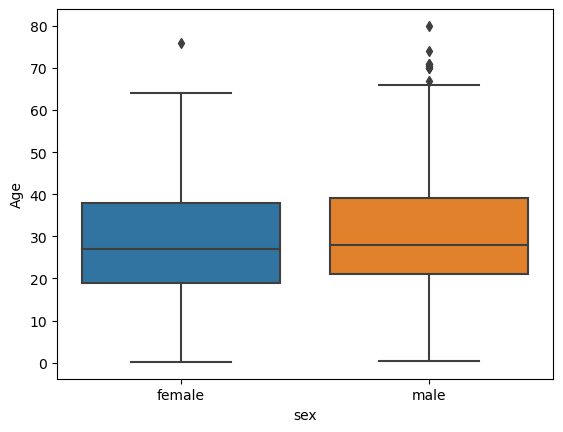

In [39]:
# create a box plot to visualize the distribution of a numeric column by the categories of a categorical column
sns.boxplot(x='sex', y='age', data=df)
plt.ylabel('age')
plt.show()

/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 34.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


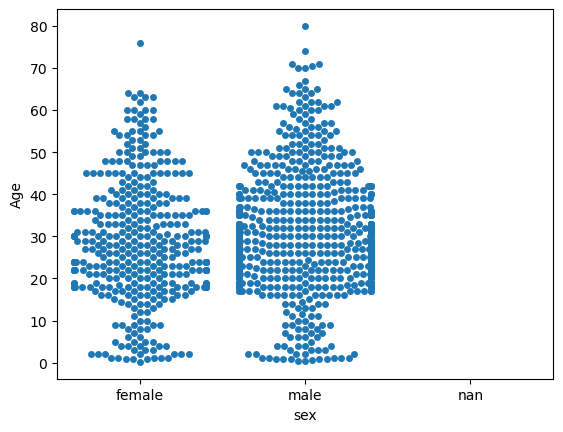

In [40]:
# create a swarm plot to visualize the distribution of a numeric column by the categories of a categorical column
sns.swarmplot(x='sex', y='age', data=df)
plt.ylabel('age')
plt.show()

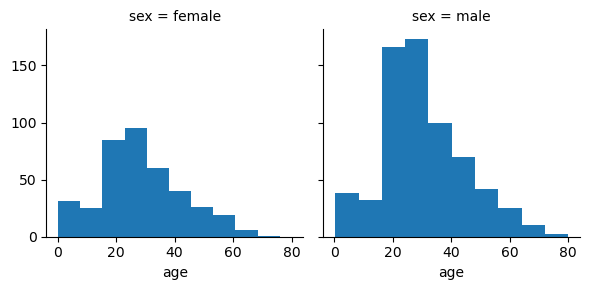

In [41]:
# create a faceting grid to visualize the distribution of multiple numeric columns by the categories of a categorical column
g = sns.FacetGrid(df, col='sex')
g.map(plt.hist, 'age')
plt.show()

/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_1809/2457992470.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)


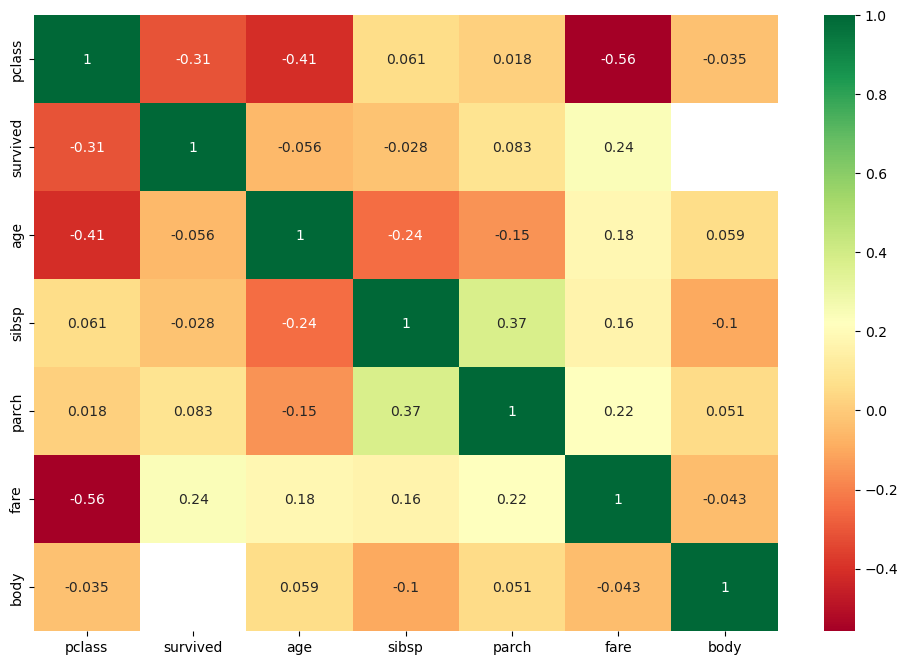

In [42]:
# create a heatmap to visualize the correlation between multiple numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)
plt.show()

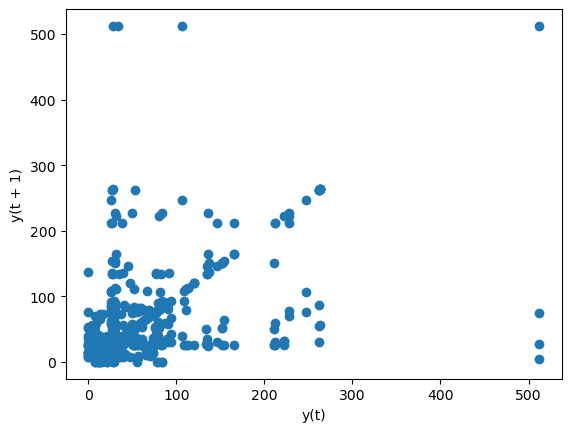

In [43]:
# create a lag plot to check for autocorrelation in a numeric column
from pandas.plotting import lag_plot
lag_plot(df['fare'])
plt.show()

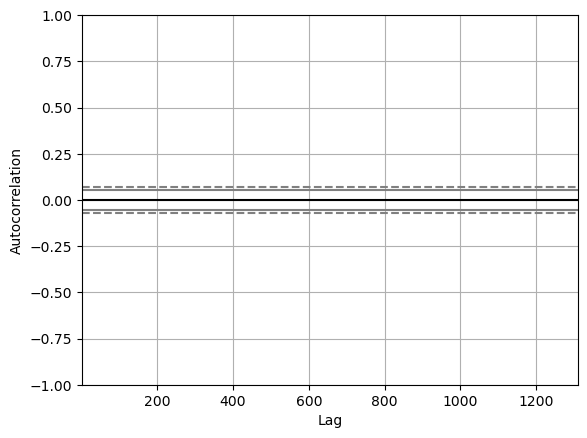

In [44]:
# create an autocorrelation plot to visualize the autocorrelation in a numeric column
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['fare'])
plt.show()

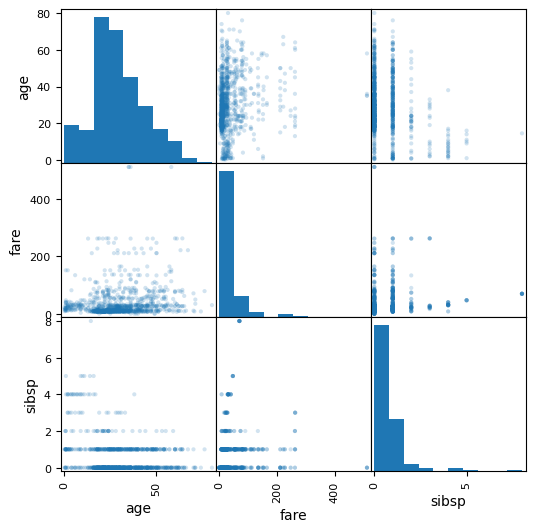

In [45]:
# create a scatter plot matrix to visualize the relationships between multiple numeric columns
from pandas.plotting import scatter_matrix
scatter_matrix(df[['age', 'fare', 'sibsp']], alpha=0.2, figsize=(6, 6))
plt.show()

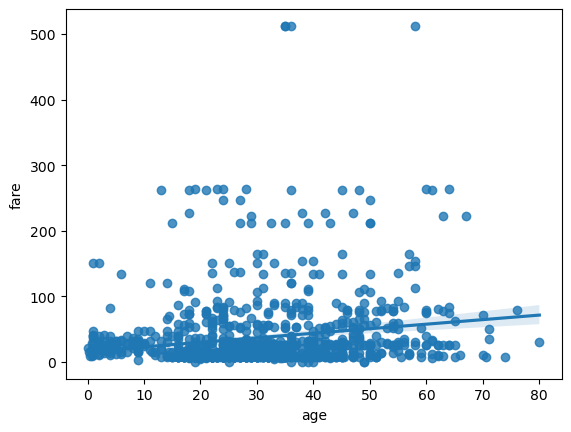

In [46]:
# create a regression plot to visualize the relationship between two numeric columns
sns.regplot(x='age', y='fare', data=df)
plt.show()

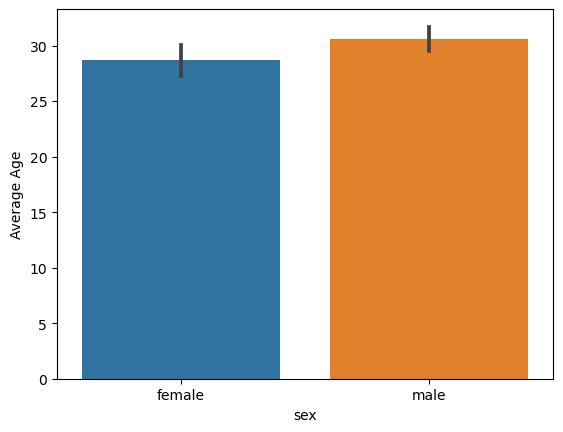

In [47]:
# create a barplot to visualize the mean of a numeric column by the categories of a categorical column
sns.barplot(x='sex', y='age', data=df)
plt.ylabel('Average age')
plt.show()

/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_1809/3043227385.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x='sex', y='age', data=df, ci=95)


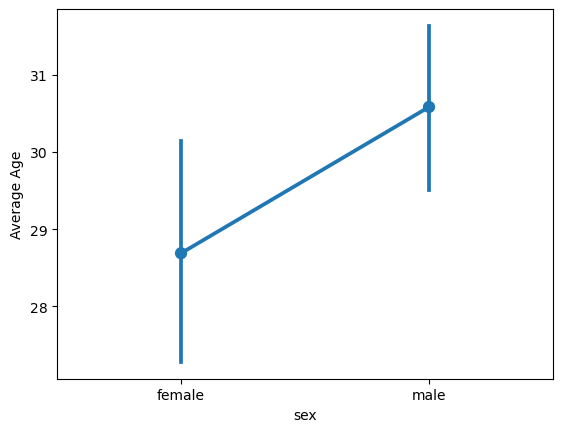

In [48]:
# create a pointplot to visualize the mean and confidence interval of a numeric column by the categories of a categorical column
sns.pointplot(x='sex', y='age', data=df, ci=95)
plt.ylabel('Average age')
plt.show()

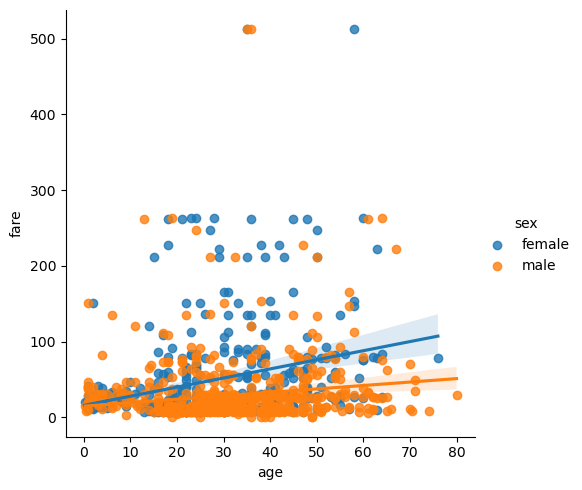

In [49]:
# create a lmplot to visualize the relationship between two numeric columns and the categories of a categorical column
sns.lmplot(x='age', y='fare', hue='sex', data=df)
plt.show()

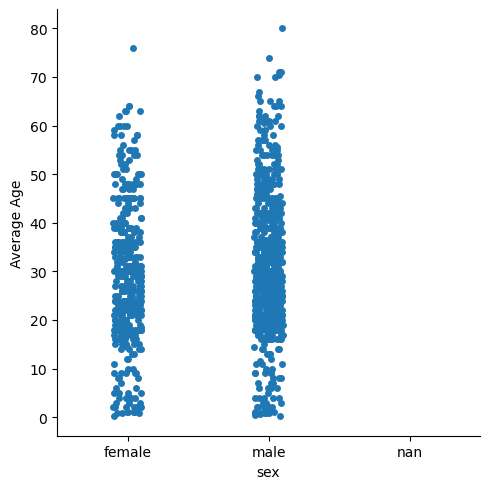

In [51]:
# create a factorplot to visualize the distribution of a numeric column by the categories of a categorical column
sns.catplot(x='sex', y='age', data=df)
plt.ylabel('Average age')
plt.show()

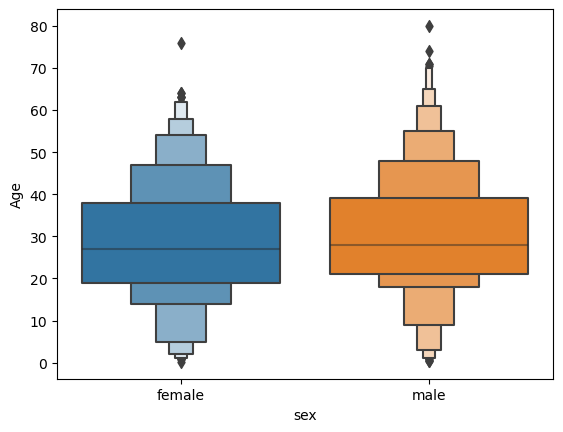

In [52]:
# create a boxenplot to visualize the distribution of a numeric column by the categories of a categorical column
sns.boxenplot(x='sex', y='age', data=df)
plt.ylabel('age')
plt.show()

/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_1809/2729105030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare'])


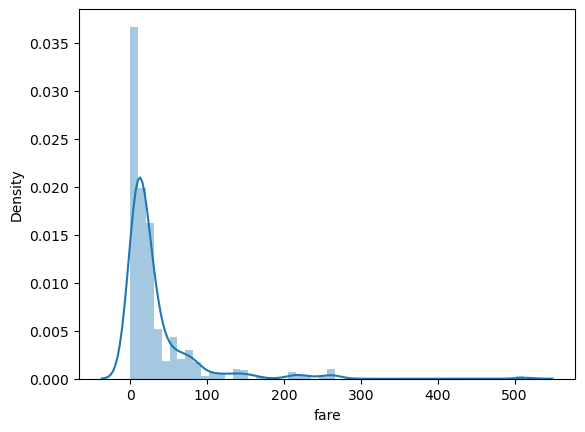

In [53]:
# create a distplot to visualize the distribution of a numeric column
sns.distplot(df['fare'])
plt.show()

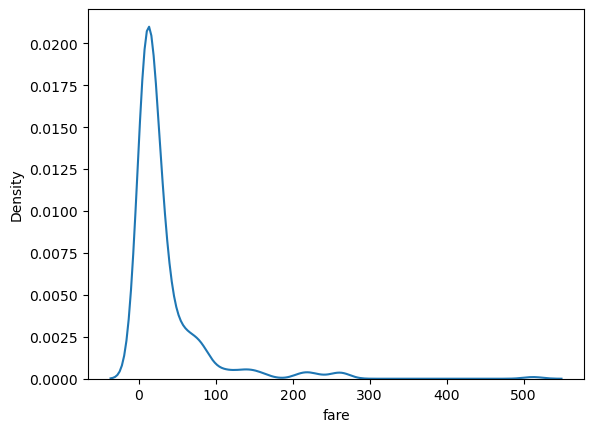

In [54]:
# create a kdeplot to visualize the kernel density estimate of a numeric column
sns.kdeplot(df['fare'])
plt.show()

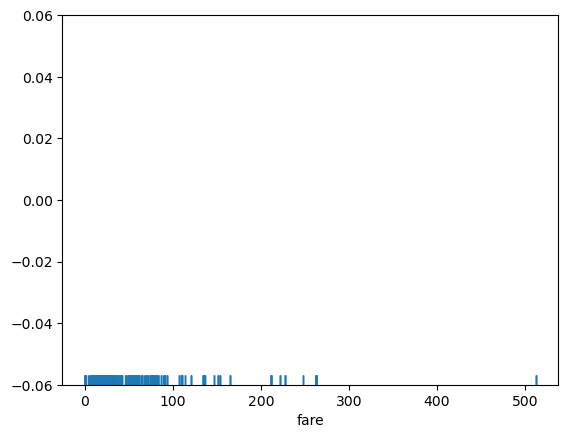

In [55]:
# create a rugplot to visualize the distribution of a numeric column
sns.rugplot(df['fare'])
plt.show()

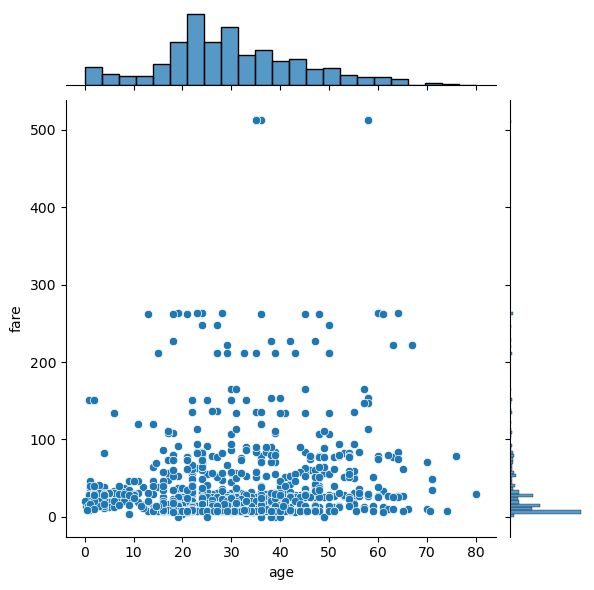

In [56]:
# create a jointplot to visualize the relationship between two numeric columns and their distributions
sns.jointplot(x='age', y='fare', data=df)
plt.show()

## Data Preprocessing
Here are some steps for data preprocessing that might be useful:


<b> Handling missing values </b> <br> 
: This technique is used when there are missing values in the dataset. There are various ways to handle missing values, such as filling them with the mean, median, or mode of the column, or dropping rows with missing values. The appropriate method will depend on the specific dataset and the goal of the analysis.<br> 
<b>Encoding categorical variables </b> <br> : This technique is used when the dataset contains categorical variables, which are variables that can take on a limited number of categories. One-hot encoding is a common method for encoding categorical variables, which creates a new binary column for each category. This is useful for inputting categorical variables into machine learning models, which typically only accept numerical input.<br> 
<b>Standardizing numeric columns </b> <br> : This technique is used to scale the values of a numeric column so that they have zero mean and unit variance. This is often useful when the numeric columns have different scales and the machine learning model will be sensitive to this difference in scales.<br> 
<b>Normalizing numeric columns </b> <br> : This technique is used to scale the values of a numeric column so that they have a minimum value of 0 and a maximum value of 1. This is often useful when the numeric columns have different scales and the machine learning model will be sensitive to this difference in scales.<br> 
<b>Binning numeric columns </b> <br> : This technique is used to divide the values of a numeric column into bins. This is useful for turning a continuous numeric column into a categorical column, which can be useful for certain types of analysis or machine learning models.<br> 
<b>Applying min-max scaling </b> <br> : This technique is used to scale the values of a numeric column so that they have a minimum value of 0 and a maximum value of 1. This is often useful when the numeric columns have different scales and the machine learning model will be sensitive to this difference in scales.<br> 
<b>Applying robust scaling </b> <br> : This technique is used to scale the values of a numeric column using the median and interquartile range. This is often useful when the data contains outliers, as it is less sensitive to the influence of outliers compared to other scaling methods.<br> 
<b>Applying power transformations </b> <br> : Power transformations are a class of functions that can be used to transform the values of a numeric column in order to stabilize or improve the assumptions of certain statistical models. Power transformations can be useful for correcting the skewness of a distribution, as skewed distributions can cause problems when fitting certain types of models.<br> 
<b>Applying quantile transformations </b> <br> : This technique is used to transform the values of a numeric column so that they have a uniform or normal distribution. This can be useful for improving the assumptions of certain machine learning models, which may assume that the predictor variables are normally distributed.<br> 
<b>Applying box-cox transformations </b> <br> : This technique is used to transform the values of a numeric column so that they are approximately normally distributed. This can be useful for improving the assumptions of certain machine learning models, which may assume that the predictor variables are normally distributed.

In [72]:
# create a copy of the original DataFrame
df_preprocessed = df.copy()

In [73]:
# handle missing values in the DataFrame
df_preprocessed['age'].fillna(df_preprocessed['age'].median(), inplace=True)


In [ ]:
df_preprocessed.dropna(inplace=True)

In [75]:
# encode categorical variables using one-hot encoding
df_preprocessed = pd.get_dummies(df_preprocessed, columns=['sex', 'pclass'], prefix=['sex', 'pclass'])

In [98]:
c=['survived', 'age', 'sibsp', 'parch', 'fare',
       'body', ]

for column in c:
    df_preprocessed[column].fillna(df_preprocessed[column].median(), inplace=True)


In [99]:
# standardize the values of a numeric column
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_preprocessed['age_scaled'] = scaler.fit_transform(df_preprocessed[['age']])

In [100]:
# normalize the values of a numeric column
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
df_preprocessed['age_normalized'] = normalizer.fit_transform(df_preprocessed[['age']])

In [101]:
# bin the values of a numeric column
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal')
df_preprocessed['age_binned'] = discretizer.fit_transform(df_preprocessed[['age']])

In [102]:
# apply a min-max scaling to a numeric column
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_preprocessed['age_scaled'] = scaler.fit_transform(df_preprocessed[['age']])

In [103]:
# apply a robust scaling to a numeric column
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_preprocessed['age_scaled'] = scaler.fit_transform(df_preprocessed[['age']])

In [104]:
# apply a power transformation to a numeric column
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson')
df_preprocessed['age_transformed'] = transformer.fit_transform(df_preprocessed[['age']])

In [105]:
# apply a quantile transformation to a numeric column
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(output_distribution='normal')
df_preprocessed['age_transformed'] = transformer.fit_transform(df_preprocessed[['age']])

In [106]:
# apply a box-cox transformation to a numeric column
from scipy.stats import boxcox

df_preprocessed['age_transformed'], lambda_ = boxcox(df_preprocessed['age'])

## Several statistical analysis methods…<br>
<b>Mann-Whitney U test</b><br>: This technique is used to compare the distribution of two numeric columns. It can be used to test the hypothesis that the two columns have the same distribution, or to determine the statistical significance of the difference between the two distributions.<br>
<b>Kruskal-Wallis H test</b><br>: This technique is similar to the Mann-Whitney U test, but it can be used to compare the distribution of two or more numeric columns. It can be used to test the hypothesis that the columns have the same distribution, or to determine the statistical significance of the difference between the distributions.<br>
<b>Wilcoxon signed-rank test</b><br>: This technique is similar to the Mann-Whitney U test, but it is used to compare the distribution of two paired numeric columns. It can be used to test the hypothesis that the two columns have the same distribution, or to determine the statistical significance of the difference between the distributions.

In [107]:
# calculate summary statistics for a numeric column
print(df_preprocessed['age'].describe())

count    1310.000000
mean       29.502036
std        12.900383
min         0.166700
25%        22.000000
50%        28.000000
75%        35.000000
max        80.000000
Name: age, dtype: float64


In [108]:
# calculate the skewness and kurtosis of a numeric column
print(df_preprocessed['age'].skew())
print(df_preprocessed['age'].kurtosis())

0.541447689925875
0.9730519991243014


In [110]:
# calculate the correlation between two numeric columns
print(df_preprocessed['age'].corr(df['fare']))

0.17925529695947412


In [112]:
# perform a t-test to compare the means of two numeric columns
from scipy.stats import ttest_ind

t, p = ttest_ind(df_preprocessed['age'], df_preprocessed['fare'])
print(t, p)

-2.556022212913576 0.010643642745413412


In [113]:
# perform an ANOVA test to compare the means of two or more numeric columns
from scipy.stats import f_oneway

f, p = f_oneway(df_preprocessed['age'], df_preprocessed['fare'])
print(f, p)

6.533249552907631 0.010643642745411455


In [114]:
# perform a Mann-Whitney U test to compare the distribution of two numeric columns
from scipy.stats import mannwhitneyu

u, p = mannwhitneyu(df_preprocessed['age'], df_preprocessed['fare'])
print(u, p)

1142806.0 4.816235227374606e-49


In [115]:
# perform a Kruskal-Wallis H test to compare the distribution of two or more numeric columns
from scipy.stats import kruskal

h, p = kruskal(df_preprocessed['age'], df_preprocessed['fare'])
print(h, p)

216.67102905374247 4.8143948619392116e-49


In [116]:
# perform a Wilcoxon signed-rank test to compare the distribution of two paired numeric columns
from scipy.stats import wilcoxon

w, p = wilcoxon(df_preprocessed['age'], df_preprocessed['fare'])
print(w, p)

327717.5 2.814246920725004e-13
